<a href="https://colab.research.google.com/github/iris10130901/AI_Project/blob/main/R%E8%AA%9E%E8%A8%80_%E7%B7%9A%E4%B8%8A%E9%9B%B6%E5%94%AE%E5%95%86%E4%BA%A4%E6%98%93%E8%B3%87%E6%96%99%E9%9B%86%E8%A1%8C%E9%8A%B7%E7%AD%96%E7%95%A5%E5%8F%8A%E7%94%A2%E5%93%81%E6%8E%A8%E8%96%A6%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataframe: Online Retail 資料集:線上零售交易紀錄

[Online Retail Data Set](https://archive.ics.uci.edu/ml/datasets/online+retail)

# 行銷策略:
1. 找出與法國銷售量相似的國家
2. 比較這兩個國家的前三項熱銷商品
3. 將沒有購買的商品作推薦 

#1 . 資料處理

In [ ]:
import pandas as pd

dfUCI = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

In [ ]:
dfUCI

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
import numpy as np
dfUCI.all()

InvoiceNo       True
StockCode       True
Description     True
Quantity        True
InvoiceDate     True
UnitPrice      False
CustomerID      True
Country         True
dtype: bool

# 2 . 變量敘述介紹:

-  InvoiceNo：發票編號。標稱，一個 6 位整數，唯一分配給每筆交易。如果此代碼以字母“c”開頭，則表示取消。
- StockCode：產品（項目）代碼。標稱，一個 5 位整數，唯一分配給每個不同的產品。
- Description：產品（項目）名稱。標稱。
數量：每筆交易的每個產品（項目）的數量。數字。
- InvoiceDate：發票日期和時間。數字，生成每筆交易的日期和時間。
- UnitPrice：單價。數字，以英鎊為單位的產品價格。
- CustomerID：客戶編號。標稱，為每個客戶唯一分配的 5 位整數。
國家：國家名稱。名義上，每個客戶所在國家的名稱。

In [ ]:
dfUCI.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
dfUCI.shape

(541909, 8)

In [ ]:
dfUCI.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
len(dfUCI.Country.unique())

38

In [ ]:
dfUCI

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
dfUCI['Quantity'] <= 0

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Quantity, Length: 541909, dtype: bool

# 3 .資料刪除

In [ ]:
dfUCI.loc[dfUCI['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
dfUCI = dfUCI[dfUCI['Quantity']>0]

In [ ]:
dfUCI.shape

(531285, 8)

In [ ]:
dfUCI['CustomerID'].isna().sum()

133361

In [ ]:
dfUCI['CustomerID'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: CustomerID, Length: 531285, dtype: bool

In [ ]:
dfUCI.loc[dfUCI['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


刪除CustomerID為Na資料

In [ ]:
print("顯示缺少'CustomerID'的紀錄之前的資料")
print(dfUCI.shape)

顯示缺少'CustomerID'的紀錄之前的資料
(531285, 8)


In [ ]:
dfUCI = dfUCI.dropna(subset=['CustomerID'])

In [ ]:
print("顯示缺少'CustomerID'的紀錄之後的資料")
print(dfUCI.shape)

顯示缺少'CustomerID'的紀錄之後的資料
(397924, 8)


## 依照國家做分群小計

In [ ]:
groupedByCountry = dfUCI['Quantity'].groupby(dfUCI['Country'])

In [ ]:
#依照國家做分群小計
country_sum = groupedByCountry.sum()
country_sum.sort_values(ascending=False)

Country
United Kingdom          4269472
Netherlands              200937
EIRE                     140525
Germany                  119263
France                   111472
Australia                 84209
Sweden                    36083
Switzerland               30083
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16122
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Israel                     4046
Poland                     3684
Canada                     2763
Iceland                    2458
USA                        2458
Unspecified                1789
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671
Lithuania                   652


In [ ]:
country_index = dfUCI['Country'].unique()
country_index

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
len(country_index)

37

#銷量前十名國家

In [ ]:
#依照國家做分群小計
country_sum = pd.DataFrame(groupedByCountry.sum().sort_values(ascending=False)).head(10)
country_sum

,Quantity
Country,
United Kingdom,4269472
Netherlands,200937
EIRE,140525
Germany,119263
France,111472
Australia,84209
Sweden,36083
Switzerland,30083
Spain,27951


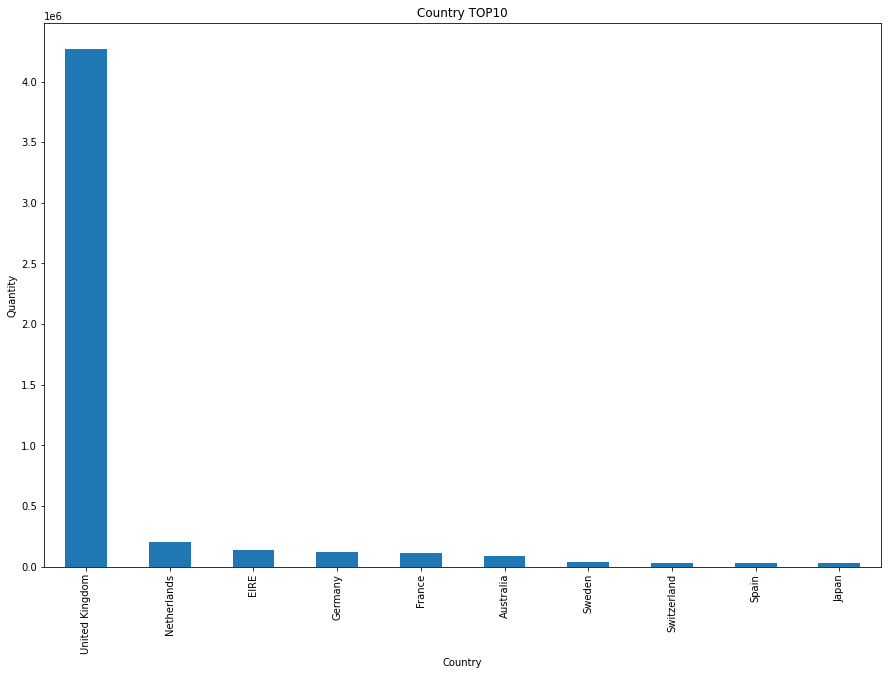

In [ ]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(15,10))
country_sum['Quantity'].plot(kind='bar')
plt.title('Country TOP10')
plt.xlabel('Country') 
plt.ylabel('Quantity')
plt.show()

# 因 法國與德國銷售量相近，故以這兩國家進行行銷策略分析

# 進行行銷策略 - 矩陣分析

# 1 .Customer-Item Matrix 客戶項目矩陣

pivot analysis table 樞紐分析表

 長數據與寬數據的相互轉換 Interconversion between long data and wide data

- index : 
必要參數。此處輸入不想要變動的數據，作為想要比較的欄位基礎，該數據會成為第一欄的索引（index），此處能以 list、array 等方式輸入多個 index，則結果會以巢狀的方式呈現。

- values(可選) :
可以對需要計算的數據做篩選，如果以 list、array 等方式輸入多個 value，則能夠分別獲得該欄位的不同數值。

- columns(可選) : 
用以分割數據，去選出想比較的特定欄位。

- aggfunc : 
function 參數。是 Pivot Table 裡最厲害的功能，能夠引入 max、min 等內建參數，甚至能自訂 function 使用。

### 1.1 customerItemMatrix

In [ ]:
# pivot table
# 樞紐分析表
country_item_matrix = dfUCI.pivot_table(
    index='Country', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)
country_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0
Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,40.0,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Channel Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN
Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
a1 = country_item_matrix.loc['France']
france_1 = a1.sort_values(ascending=False).head(10)
france_1

StockCode
23084    4000.0
22492    2196.0
21731    1291.0
21086    1272.0
84879    1204.0
21212    1176.0
22554    1144.0
22556    1144.0
21094    1116.0
22551    1012.0
Name: France, dtype: float64

In [ ]:
a2= country_item_matrix.loc['Germany']
germany_1 = a2.sort_values(ascending=False).head(10)
germany_1

StockCode
22326    1233.0
15036    1164.0
POST     1114.0
20719    1020.0
21212    1002.0
22585     936.0
22629     876.0
22554     857.0
22961     816.0
22423     809.0
Name: Germany, dtype: float64

# 2 .對資料以0和1進行編碼 0-1 encode
- 對資料以0和1進行編碼
- 當值為1，表示某客戶購買了某項產品
- 當值為0，則客戶代表不曾購買某產品

In [ ]:
country_item_matrix = country_item_matrix.applymap(lambda x: 1 if x > 0 else 0) #大於0的存成1
#applymap()對資料框所有元素套用指定函數
country_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Austria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Bahrain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Channel Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
Cyprus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
Czech Republic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 3 .  User-to-User Similarity Matrix 國家購買商品的相似度矩陣

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
user_country_sim_matrix = pd.DataFrame(
    cosine_similarity(country_item_matrix)
)
user_country_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.000000,0.334012,0.051074,0.451468,0.130012,0.249379,0.354670,0.309427,0.040859,0.327532,...,0.193141,0.068098,0.220500,0.428006,0.336371,0.466035,0.345634,0.168466,0.405382,0.212770
1,0.334012,1.000000,0.100041,0.387606,0.151585,0.108445,0.270166,0.217743,0.057166,0.270622,...,0.135113,0.057166,0.167107,0.385951,0.293695,0.401253,0.268656,0.201040,0.289742,0.172346
2,0.051074,0.100041,1.000000,0.071750,0.176777,0.082479,0.012056,0.112028,0.000000,0.015780,...,0.032827,0.000000,0.056215,0.113532,0.015475,0.089363,0.058745,0.030317,0.066254,0.017130
3,0.451468,0.387606,0.071750,1.000000,0.101469,0.254466,0.368498,0.318302,0.057400,0.350982,...,0.188424,0.083708,0.198981,0.509389,0.384163,0.538588,0.325952,0.156617,0.461108,0.216313
4,0.130012,0.151585,0.176777,0.101469,1.000000,0.087482,0.085249,0.142588,0.000000,0.055790,...,0.023212,0.000000,0.079500,0.117743,0.043769,0.137867,0.041539,0.085749,0.093697,0.060563
5,0.249379,0.108445,0.082479,0.254466,0.087482,1.000000,0.131257,0.158926,0.032991,0.223858,...,0.064980,0.054986,0.092730,0.242215,0.168475,0.254618,0.116284,0.120024,0.200821,0.107375
6,0.354670,0.270166,0.012056,0.368498,0.085249,0.131257,1.000000,0.289572,0.048224,0.225248,...,0.164636,0.032150,0.224103,0.414641,0.244771,0.368263,0.188861,0.146201,0.343467,0.237908
7,0.309427,0.217743,0.112028,0.318302,0.142588,0.158926,0.289572,1.000000,0.044811,0.169707,...,0.152984,0.044811,0.154502,0.362230,0.174745,0.332005,0.175494,0.097815,0.369629,0.193435
8,0.040859,0.057166,0.000000,0.057400,0.000000,0.032991,0.048224,0.044811,1.000000,0.037872,...,0.000000,0.000000,0.059963,0.084771,0.111417,0.071490,0.031330,0.024254,0.082817,0.041111
9,0.327532,0.270622,0.015780,0.350982,0.055790,0.223858,0.225248,0.169707,0.037872,1.000000,...,0.132608,0.063119,0.108813,0.309575,0.312560,0.377404,0.222475,0.145433,0.262415,0.155695


In [ ]:
user_country_sim_matrix.shape

(37, 37)

In [ ]:
user_country_sim_matrix.columns = country_item_matrix.index

user_country_sim_matrix['Country'] = country_item_matrix.index
user_country_sim_matrix= user_country_sim_matrix .set_index('Country')

user_country_sim_matrix

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Country,,,,,,,,,,,,,,,,,,,,,
Australia,1.000000,0.334012,0.051074,0.451468,0.130012,0.249379,0.354670,0.309427,0.040859,0.327532,...,0.193141,0.068098,0.220500,0.428006,0.336371,0.466035,0.345634,0.168466,0.405382,0.212770
Austria,0.334012,1.000000,0.100041,0.387606,0.151585,0.108445,0.270166,0.217743,0.057166,0.270622,...,0.135113,0.057166,0.167107,0.385951,0.293695,0.401253,0.268656,0.201040,0.289742,0.172346
Bahrain,0.051074,0.100041,1.000000,0.071750,0.176777,0.082479,0.012056,0.112028,0.000000,0.015780,...,0.032827,0.000000,0.056215,0.113532,0.015475,0.089363,0.058745,0.030317,0.066254,0.017130
Belgium,0.451468,0.387606,0.071750,1.000000,0.101469,0.254466,0.368498,0.318302,0.057400,0.350982,...,0.188424,0.083708,0.198981,0.509389,0.384163,0.538588,0.325952,0.156617,0.461108,0.216313
Brazil,0.130012,0.151585,0.176777,0.101469,1.000000,0.087482,0.085249,0.142588,0.000000,0.055790,...,0.023212,0.000000,0.079500,0.117743,0.043769,0.137867,0.041539,0.085749,0.093697,0.060563
Canada,0.249379,0.108445,0.082479,0.254466,0.087482,1.000000,0.131257,0.158926,0.032991,0.223858,...,0.064980,0.054986,0.092730,0.242215,0.168475,0.254618,0.116284,0.120024,0.200821,0.107375
Channel Islands,0.354670,0.270166,0.012056,0.368498,0.085249,0.131257,1.000000,0.289572,0.048224,0.225248,...,0.164636,0.032150,0.224103,0.414641,0.244771,0.368263,0.188861,0.146201,0.343467,0.237908
Cyprus,0.309427,0.217743,0.112028,0.318302,0.142588,0.158926,0.289572,1.000000,0.044811,0.169707,...,0.152984,0.044811,0.154502,0.362230,0.174745,0.332005,0.175494,0.097815,0.369629,0.193435
Czech Republic,0.040859,0.057166,0.000000,0.057400,0.000000,0.032991,0.048224,0.044811,1.000000,0.037872,...,0.000000,0.000000,0.059963,0.084771,0.111417,0.071490,0.031330,0.024254,0.082817,0.041111


# 4 . 國家之間最為相似的購買商品相似度由大到小排序 以法國為基準

In [ ]:
user_country_sim_matrix.loc['France'].sort_values(ascending=False).head(10) #相似度0.733089

Country
France            1.000000
Germany           0.733089
EIRE              0.676876
United Kingdom    0.645763
Switzerland       0.613882
Spain             0.611514
Belgium           0.585763
Netherlands       0.568857
Portugal          0.512816
Australia         0.512139
Name: France, dtype: float64

## 分析並制定策略:
- 由上可知，France和Germany的餘弦相似度為0.733089
- 行銷策略為以國家France作為目標，推薦策略為向國家Germany購買尚未購買之產品


# 5 . 取得兩個國家的購買清單

## 5.1 取得France十大銷量購買清單

In [ ]:
import numpy as np
import pandas as pd
series_1 = pd.Series(france_1).sort_values(ascending=False)
series_1

StockCode
23084    4000.0
22492    2196.0
21731    1291.0
21086    1272.0
84879    1204.0
21212    1176.0
22554    1144.0
22556    1144.0
21094    1116.0
22551    1012.0
Name: France, dtype: float64

In [ ]:
#iloc()以第n筆來選擇資料
items_bought_by_A = set(france_1.iloc[
    france_1.to_numpy().nonzero()
].index)
items_bought_by_A

{21086, 21094, 21212, 21731, 22492, 22551, 22554, 22556, 23084, 84879}

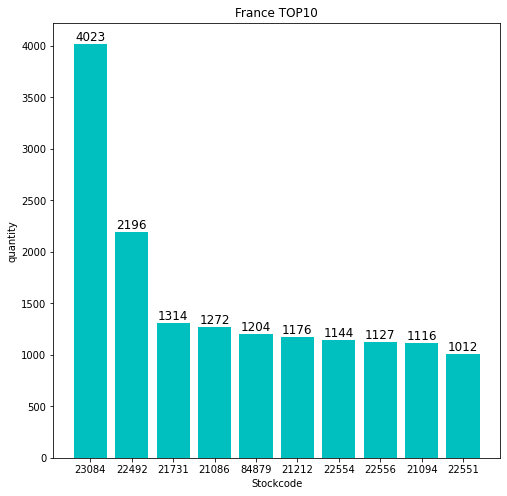

In [ ]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(8,8))
x1 = ['23084','22492','21731','21086','84879','21212','22554','22556','21094','22551']
y1 = [4023,2196,1314,1272,1204,1176,1144,1127,1116,1012]  
plt.bar(x1, y1, color = 'c',align = 'center') 
plt.title('France TOP10') 
plt.xlabel('Stockcode') 
plt.ylabel('quantity')
for a,b in zip(x1,y1):#顯示數值
  plt.text(a,b+0.05,'%.0f'%b,ha='center',va='bottom',fontsize=12)
plt.show()

## 5.2 取得Germany十大銷量購買清單

In [ ]:
import numpy as np 
series_2 = pd.Series(germany_1)
series_2

StockCode
22326    1233.0
15036    1164.0
POST     1114.0
20719    1020.0
21212    1002.0
22585     936.0
22629     876.0
22554     857.0
22961     816.0
22423     809.0
Name: Germany, dtype: float64

In [ ]:
#iloc()以第n筆來選擇資料
items_bought_by_B = set(germany_1.iloc[
    germany_1.to_numpy().nonzero()
].index)
items_bought_by_B

{15036, 20719, 21212, 22326, 22423, 22554, 22585, 22629, 22961, 'POST'}

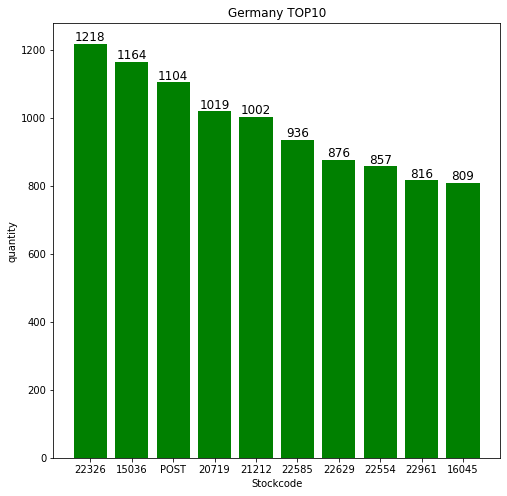

In [ ]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(8,8))
x2 = ['22326','15036','POST','20719','21212','22585','22629','22554','22961','16045']
y2 = [1218,1164,1104,1019,1002,936,876,857,816,809]  
plt.bar(x2, y2, color ='g',align = 'center') 
plt.title('Germany TOP10') 
plt.xlabel('Stockcode') 
plt.ylabel('quantity')
for a,b in zip(x2,y2):#顯示數值
  plt.text(a,b+0.05,'%.0f'%b,ha='center',va='bottom',fontsize=12)
plt.show()

# 6 .找出France買過，而Germany未曾買過的商品，推薦給Germany購買

In [ ]:
#找出France買過，而Germany未曾買過的商品，推薦給Germany購買
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B

items_to_recommend_to_B

{21086, 21094, 21731, 22492, 22551, 22556, 23084, 84879}

## 以下是推薦給Germany購買的清單:

推薦清單編號: 21086, 21094, 21731, 22492, 22551, 22556, 23084, 84879


In [ ]:
dfUCI.loc[
    dfUCI['StockCode'].isin(items_to_recommend_to_B), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

#isin() --> 接受一個列表，判斷該列中元素是否在列表中。可同時對多列使用

,Description
StockCode,
84879,ASSORTED COLOUR BIRD ORNAMENT
21731,RED TOADSTOOL LED NIGHT LIGHT
22492,MINI PAINT SET VINTAGE
21094,SET/6 RED SPOTTY PAPER PLATES
21086,SET/6 RED SPOTTY PAPER CUPS
22551,PLASTERS IN TIN SPACEBOY
22556,PLASTERS IN TIN CIRCUS PARADE
23084,RABBIT NIGHT LIGHT


#7 .Item-based Collaborative Filtering 產品導向協同過濾
Item-to-Item Similarity Matrix 找出產品間的餘弦相似度

In [ ]:
#Item-to-Item Similarity Matrix
#計算產品與產品餘弦相似度矩陣
item_item_sim_matrix = pd.DataFrame(cosine_similarity(country_item_matrix.T))

item_item_sim_matrix.columns = country_item_matrix.T.index

item_item_sim_matrix['StockCode'] = country_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')

item_item_sim_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.377964,0.534522,0.755929,0.462910,0.617213,0.714286,0.377964,0.507093,0.478091,...,0.377964,0.377964,0.377964,0.377964,0.377964,0.566947,0.377964,0.436436,0.377964,0.394055
10080,0.377964,1.000000,0.707107,0.500000,0.408248,0.408248,0.377964,1.000000,0.447214,0.316228,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.288675,1.000000,0.208514
10120,0.534522,0.707107,1.000000,0.707107,0.288675,0.577350,0.534522,0.707107,0.316228,0.447214,...,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.408248,0.707107,0.294884
10125,0.755929,0.500000,0.707107,1.000000,0.408248,0.612372,0.566947,0.500000,0.447214,0.474342,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.433013,0.500000,0.417029
10133,0.462910,0.408248,0.288675,0.408248,1.000000,0.500000,0.462910,0.408248,0.182574,0.258199,...,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248,0.353553,0.408248,0.340503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0.566947,0.500000,0.707107,0.500000,0.408248,0.612372,0.566947,0.500000,0.223607,0.474342,...,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.577350,0.500000,0.208514
DOT,0.377964,1.000000,0.707107,0.500000,0.408248,0.408248,0.377964,1.000000,0.447214,0.316228,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.288675,1.000000,0.208514
M,0.436436,0.288675,0.408248,0.433013,0.353553,0.589256,0.654654,0.288675,0.387298,0.547723,...,0.288675,0.288675,0.288675,0.288675,0.288675,0.577350,0.288675,1.000000,0.288675,0.481543


## 因產品編號23084為France最熱銷商品，故以此來分析:

In [ ]:
#依照餘弦相似度排序而非商品代號
#取得產品23084前10相似度之產品

top_10_similar_items = list(
    item_item_sim_matrix\
        .loc[23084]\
        .sort_values(ascending=False)\
        .iloc[:10]\
    .index
)
# '\'  --> 續行符號

top_10_similar_items

[23084, 23480, 21216, 21731, 84380, '47591D', 23154, 84378, 21981, 23108]

## 通過上述可得知，以推薦清單中的商品23084為例，以下是類似商品的清單:

In [ ]:
#取得相關產品描述
#Get related product description
dfUCI.loc[
    dfUCI['StockCode'].isin(top_10_similar_items), 
    ['StockCode', 'Description']
    ].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
23084,RABBIT NIGHT LIGHT
23480,MINI LIGHTS WOODLAND MUSHROOMS
21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR"
21731,RED TOADSTOOL LED NIGHT LIGHT
84380,SET OF 3 BUTTERFLY COOKIE CUTTERS
47591D,PINK FAIRY CAKE CHILDRENS APRON
23154,SET OF 4 JAM JAR MAGNETS
84378,SET OF 3 HEART COOKIE CUTTERS
21981,PACK OF 12 WOODLAND TISSUES


#購物籃分析－apriori  [kaggle](https://www.kaggle.com/code/hassanamin/market-basket-analysis-for-online-retail-dataset/notebook)
apriori此一套件將會幫我們計算所有array內的產品組合數據support、confidence與lift，再根據我們所設定的條件進行篩選。

假設顧客買了商品組合中的部份商品，是否應推薦組合中的其他商品給顧客，這就是所謂的『Association Rules』，我們可以訂定最小信心度(min_confidence)

In [ ]:
pip install apriori

  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2477 sha256=e374276d7d0bfaf8d69bf77431ba890470f70d04eab26b78f98ccb8816231d98
  Stored in directory: /root/.cache/pip/wheels/07/e9/8c/7b459f4d6c59bf4227af9985c66c66623b6cfe81e6327002c5
Successfully built apriori


In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
data = dfUCI
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 1 . 清理被取消訂單

In [ ]:
data['Description'] = data['Description'].str.strip()
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]

將項目合併成每行一筆交易

在清理之後，需要將項目合併為每行1個事務，每個產品1個熱編碼。只看法國的銷售情況，將把這些結果與來自德國的銷售進行比較。

In [ ]:
basket = (data[data['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [ ]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


處理為0的資料

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

# 2 . 設定最小支持度(min_support)

如果根據公司策略想找尋更多不同種類的產品組合，那麼可將最小支持度降低，此舉將幫助我們找到更多的產品組合。新增的產品組合中若有支持度低但提升度高的組合，即為具有潛力的產品組合。然而，最小支持度過低，容易造成商品組合的決策困難，因為可能在選出的組合中，該商品銷售量最少，但其可能具有不錯的銷售潛力，但卻因支持度太低，而沒有被選為最終的產品組點。

須將各項產品items、support、confidence與lift取出來

最小支持度設為0.07，以過濾掉不推薦的商品

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

取出產品組合內的各項產品與support

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135


# 3 . 視覺化信心度與最小支持度之間的關係

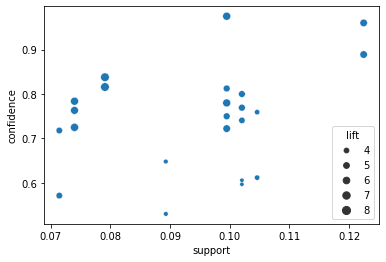

In [ ]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt


# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()

# 4 . 過濾規則Dataframe

可以看到有些rules有較高的信心值，這意味著在給定事務和產品組合數量的情況下，它發生的頻率比預期的要高。

作法: 提高lift與信心值
large lift (6)和confidence (.8):

In [ ]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
21,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
22,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850


Popular Product Combinations by Country

In [ ]:
basket2 = (data[data['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))


basket2.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket3 = (data[data['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))


basket3.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


最小支持度為0.05

In [ ]:
basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

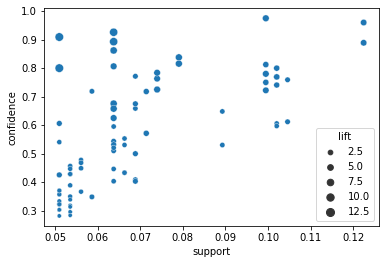

In [ ]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt


# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules2)
plt.show()

In [ ]:
rules2[ (rules2['lift'] >= 4) &
        (rules2['confidence'] >= 0.5)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135
5,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061
8,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.068878,0.071429,0.063776,0.925926,12.962963,0.058856,12.535714
9,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.071429,0.068878,0.063776,0.892857,12.962963,0.058856,8.690476
10,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.125000,0.099490,0.071429,0.571429,5.743590,0.058992,2.101190
11,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.099490,0.125000,0.071429,0.717949,5.743590,0.058992,3.102273


In [ ]:
pip install pivottablejs

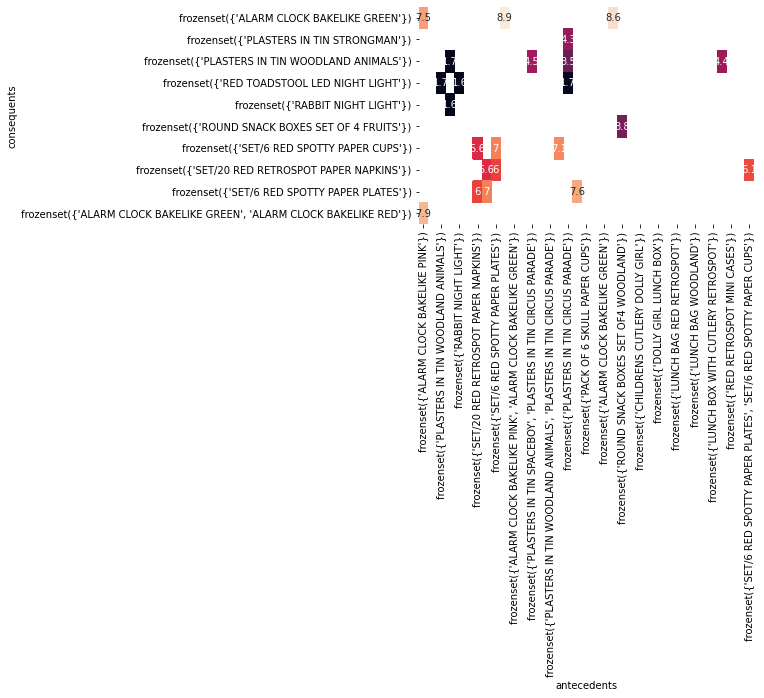

<Figure size 5760x14400 with 0 Axes>

In [ ]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui

# Transform the DataFrame of rules into a matrix using the lift metric

pivot = rules2.pivot(index = 'consequents', columns = 'antecedents', values= 'lift').head(10)

# Generate a heatmap with annotations on and the colorbar off

sns.heatmap(pivot, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
fig=plt.figure(figsize=(80,200))
plt.show()